## Regression Analysis
Developing models and selecting the best according to the R-squared criterion.

In [1]:
# importing libraries
import pandas as pd # data science essentials
import matplotlib.pyplot as plt # essential graphical output
import seaborn as sns # enhanced graphical output
import numpy as np # mathematical essentials
import statsmodels.formula.api as smf # regression modeling


# specifying file name
file = "./__datasets/birthweight_low.xlsx"


# reading the file into Python
birth = pd.read_excel(io           = file,
                      header       = 0,
                      sheet_name   = 0)

# showing the first 5 rows
birth.head()

,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght
0,69,NaN,5,2.0,62,NaN,4,7,23,9,1,0,1,0,0,1,0,697
1,68,12.0,3,10.0,61,11.0,4,6,25,11,1,1,0,0,1,0,0,1290
2,71,12.0,3,6.0,46,12.0,2,7,21,12,1,0,1,0,0,1,0,1490
3,59,16.0,1,8.0,48,16.0,7,8,21,10,0,0,0,1,0,0,1,1720
4,48,12.0,4,6.0,39,12.0,2,9,17,13,0,1,0,0,1,0,0,1956


In [2]:
# viewing information of the dataset
birth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mage    196 non-null    int64  
 1   meduc   193 non-null    float64
 2   monpre  196 non-null    int64  
 3   npvis   193 non-null    float64
 4   fage    196 non-null    int64  
 5   feduc   189 non-null    float64
 6   omaps   196 non-null    int64  
 7   fmaps   196 non-null    int64  
 8   cigs    196 non-null    int64  
 9   drink   196 non-null    int64  
 10  male    196 non-null    int64  
 11  mwhte   196 non-null    int64  
 12  mblck   196 non-null    int64  
 13  moth    196 non-null    int64  
 14  fwhte   196 non-null    int64  
 15  fblck   196 non-null    int64  
 16  foth    196 non-null    int64  
 17  bwght   196 non-null    int64  
dtypes: float64(3), int64(15)
memory usage: 27.7 KB


In [3]:
# running a descriptive statistics
birth.describe().round(2)

,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght
count,196.00,193.00,196.00,193.00,196.00,189.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00
mean,40.15,13.91,2.34,11.60,39.29,13.85,8.19,8.96,10.93,5.40,0.55,0.27,0.38,0.35,0.35,0.34,0.31,3334.09
std,10.25,2.06,1.36,4.27,8.98,2.63,1.58,0.65,6.10,3.00,0.50,0.45,0.49,0.48,0.48,0.48,0.46,646.70
min,23.00,8.00,1.00,2.00,23.00,1.00,2.00,5.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,697.00
25%,33.00,12.00,2.00,10.00,34.75,12.00,8.00,9.00,6.00,4.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2916.25
50%,39.00,14.00,2.00,12.00,38.00,14.00,9.00,9.00,11.00,5.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,3452.00
75%,46.00,16.00,3.00,12.00,43.00,16.00,9.00,9.00,15.25,7.25,1.00,1.00,1.00,1.00,1.00,1.00,1.00,3759.50
max,71.00,17.00,8.00,35.00,73.00,17.00,10.00,10.00,25.00,14.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,4933.00


In [4]:
# checking for missing values
birth.isnull().any()

mage      False
meduc      True
monpre    False
npvis      True
fage      False
feduc      True
omaps     False
fmaps     False
cigs      False
drink     False
male      False
mwhte     False
mblck     False
moth      False
fwhte     False
fblck     False
foth      False
bwght     False
dtype: bool

In [5]:
# viewing the total number of missing values per variable
birth.isnull().sum()

mage      0
meduc     3
monpre    0
npvis     3
fage      0
feduc     7
omaps     0
fmaps     0
cigs      0
drink     0
male      0
mwhte     0
mblck     0
moth      0
fwhte     0
fblck     0
foth      0
bwght     0
dtype: int64

In [6]:
# controlling the skewness of each variable
birth.skew().round(2)

mage      0.92
meduc    -0.07
monpre    2.03
npvis     2.21
fage      1.12
feduc    -1.31
omaps    -2.64
fmaps    -2.55
cigs      0.03
drink     0.23
male     -0.21
mwhte     1.04
mblck     0.49
moth      0.65
fwhte     0.65
fblck     0.67
foth      0.82
bwght    -0.66
dtype: float64

In [7]:
# replacing the missing values with the median
birth.fillna(birth.median(), inplace=True)

# checking if the missing values were actually replaced
birth.isnull().any().any()

False

In [8]:
# defining the new columns for the dummies
birth['high_meduc']      = 0
birth['high_fage']      = 0
birth['high_mage']      = 0
birth['high_fmaps']      = 0

# iterating over each original column to
# change values in the new feature columns
for index, value in birth.iterrows():


    # meduc
    if birth.loc[index, 'meduc'] > 15:
        birth.loc[index, 'high_meduc'] = 1
        
    # mage
    if birth.loc[index, 'mage'] > 40:
        birth.loc[index, 'high_mage'] = 1
        
        # fage
    if birth.loc[index, 'fage'] > 41:
        birth.loc[index, 'high_fage'] = 1
        
    # fmaps
    if birth.loc[index, 'fmaps'] > 8:
        birth.loc[index, 'high_fmaps'] = 1
        
# checking results
birth[  ['high_meduc', 'high_mage', 'high_fage', 'high_fmaps']  ].head(n = 5)

,high_meduc,high_mage,high_fage,high_fmaps
0,0,1,1,0
1,0,1,1,0
2,0,1,1,0
3,1,1,1,0
4,0,1,0,1


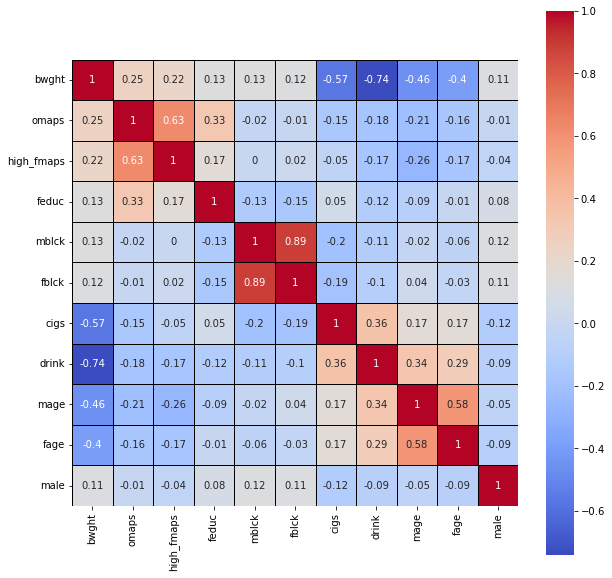

bwght         1.00
omaps         0.25
fmaps         0.25
high_fmaps    0.22
feduc         0.13
mblck         0.13
fblck         0.12
male          0.11
meduc         0.09
npvis         0.06
high_meduc    0.06
moth         -0.02
fwhte        -0.04
monpre       -0.05
foth         -0.08
mwhte        -0.11
high_mage    -0.29
high_fage    -0.33
fage         -0.40
mage         -0.46
cigs         -0.57
drink        -0.74
Name: bwght, dtype: float64


In [9]:
# creating a (Pearson) correlation matrix
birth_corr = birth.corr().round(2)

# limiting the size of the correlation matrix
birth_corr2 = birth_corr.loc[ ['bwght', 'omaps', 'high_fmaps',
                               'feduc', 'mblck', 'fblck', 'cigs', 'drink', 'mage', 'fage', 'male'],
                              ['bwght', 'omaps', 'high_fmaps',
                               'feduc', 'mblck', 'fblck', 'cigs', 'drink', 'mage', 'fage', 'male']]

# setting figure size
fig, ax = plt.subplots(figsize=(10,10))

# visualizing the correlation matrix
sns.heatmap(birth_corr2,
            cmap = 'coolwarm',
            square = True,
            annot = True,
            linecolor = 'black',
            linewidths = 0.5)

plt.show()


# printing (Pearson) correlations with bwght
print(birth_corr.loc['bwght'].sort_values(ascending = False))

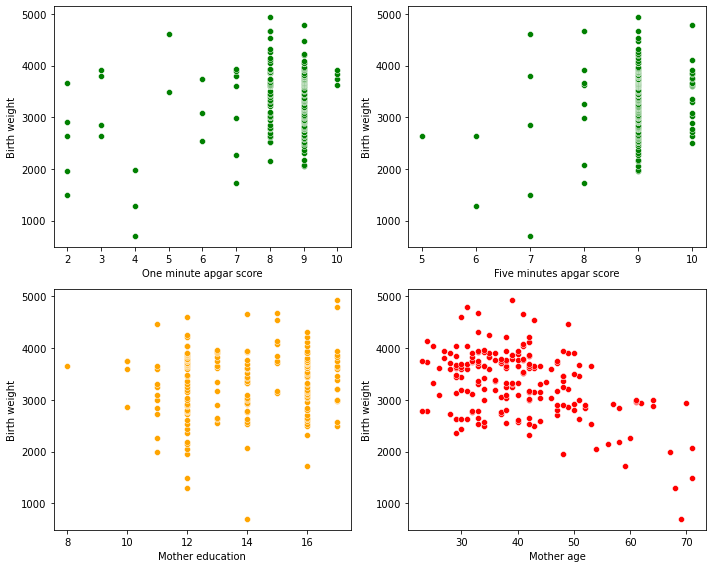

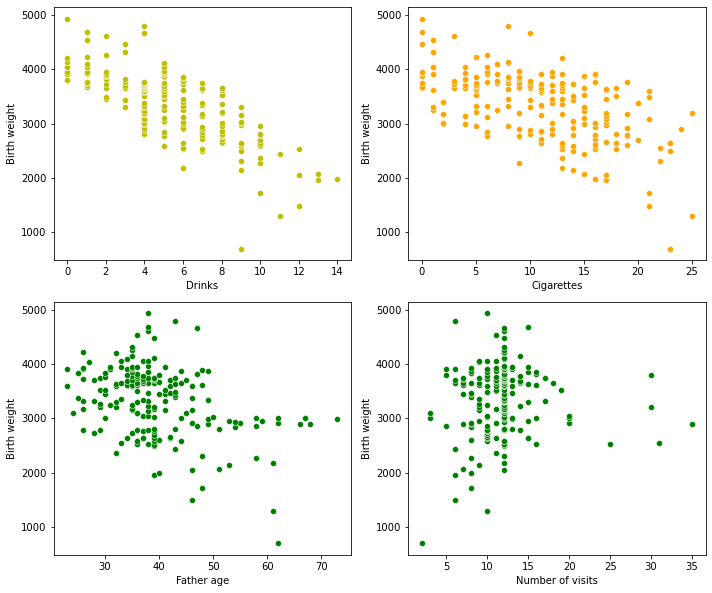

In [10]:
# setting figure size
fig, ax = plt.subplots(figsize = (10, 8))


# developing a scatterplot
plt.subplot(2, 2, 1)
sns.scatterplot(x = birth['omaps'],
                y = birth['bwght'],
                color = 'g')


# adding labels but not adding title
plt.xlabel(xlabel = 'One minute apgar score')
plt.ylabel(ylabel = 'Birth weight')


########################


# developing a scatterplot
plt.subplot(2, 2, 2)
sns.scatterplot(x = birth['fmaps'],
                y = birth['bwght'],
                color = 'g')


# adding labels but not adding title
plt.xlabel(xlabel = 'Five minutes apgar score')
plt.ylabel(ylabel = 'Birth weight')


########################


# developing a scatterplot
plt.subplot(2, 2, 3)
sns.scatterplot(x = birth['meduc'],
                y = birth['bwght'],
                color = 'orange')


# adding labels but not adding title
plt.xlabel(xlabel = 'Mother education')
plt.ylabel(ylabel = 'Birth weight')


########################


# developing a scatterplot
plt.subplot(2, 2, 4)
sns.scatterplot(x = birth['mage'],
                y = birth['bwght'],
                color = 'r')


# adding labels but not adding title
plt.xlabel(xlabel = 'Mother age')
plt.ylabel(ylabel = 'Birth weight')


# cleaning up the layout, saving the figures, and displaying the results
plt.tight_layout()
plt.show()


########################

# setting figure size
fig, ax = plt.subplots(figsize = (10, 12))


# developing a scatterplot
plt.subplot(3, 2, 1)
sns.scatterplot(x = birth['drink'],
                y = birth['bwght'],
                color = 'y')


# adding labels but not adding title
plt.xlabel(xlabel = 'Drinks')
plt.ylabel(ylabel = 'Birth weight')


########################


# developing a scatterplot
plt.subplot(3, 2, 2)
sns.scatterplot(x = birth['cigs'],
                y = birth['bwght'],
                color = 'orange')


# adding labels but not adding title
plt.xlabel(xlabel = 'Cigarettes')
plt.ylabel(ylabel = 'Birth weight')


########################

# developing a scatterplot
plt.subplot(3, 2, 3)
sns.scatterplot(x = birth['fage'],
                y = birth['bwght'],
                color = 'g')


# adding labels but not adding title
plt.xlabel(xlabel = 'Father age')
plt.ylabel(ylabel = 'Birth weight')


########################

# developing a scatterplot
plt.subplot(3, 2, 4)
sns.scatterplot(x = birth['npvis'],
                y = birth['bwght'],
                color = 'g')


# adding labels but not adding title
plt.xlabel(xlabel = 'Number of visits')
plt.ylabel(ylabel = 'Birth weight')


########################


# cleaning up the layout, saving the figures, and displaying the results
plt.tight_layout()
plt.show()

In [11]:
# running the ols regression
lm_ols = smf.ols(formula = """bwght ~ drink +
                                      cigs  +
                                      high_fmaps +
                                      high_meduc +
                                      high_fage +
                                      high_mage""",
                  data = birth)

# telling Python to run the data through the blueprint
results_ols = lm_ols.fit()


# printing the results
print(results_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                  bwght   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     72.85
Date:                Sun, 19 Dec 2021   Prob (F-statistic):           1.58e-46
Time:                        18:27:30   Log-Likelihood:                -1428.7
No. Observations:                 196   AIC:                             2871.
Df Residuals:                     189   BIC:                             2894.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4312.6664    117.342     36.753      0.0

In [12]:
# isolating the target variable
y = birth['bwght']

# creating the OLS dataset
X_ols = birth.loc[: , ['cigs', 'drink', 'high_fmaps', 'high_meduc', 'high_fage', 'high_mage']]

In [13]:
from sklearn.model_selection import train_test_split

# splitting the ols dataset
X_train_ols, X_test_ols, y_train_ols, y_test_ols = train_test_split(X_ols, y, random_state = 219, test_size = 0.25)

In [14]:
# checking the shapes of the OLS datasets
print(f"""
Training Data OLS
-------------
X-side: {X_train_ols.shape}
y-side: {y_train_ols.shape}


Testing Data OLS
------------
X-side: {X_test_ols.shape}
y-side: {y_test_ols.shape}
""")


Training Data OLS
-------------
X-side: (147, 6)
y-side: (147,)


Testing Data OLS
------------
X-side: (49, 6)
y-side: (49,)



In [15]:
from sklearn.linear_model import LinearRegression

# Create the regressor: reg_all
reg_all = LinearRegression()

# Fit the regressor to the training data
reg_fit = reg_all.fit(X_train_ols, y_train_ols)

# Predict on the test data: y_pred
y_pred = reg_fit.predict(X_test_ols)

# SCORING the results
print('OLS Training Score :', reg_all.score(X_train_ols, y_train_ols).round(4))  # using R-square
print('OLS Testing Score  :', reg_all.score(X_test_ols, y_test_ols).round(4)) # using R-square

# saving the scores
reg_train_score = reg_all.score(X_train_ols, y_train_ols).round(4)
reg_test_score = reg_all.score(X_test_ols, y_test_ols).round(4)


# displaying and saving the gap between training and testing
print('OLS Train-Test Gap :', abs(reg_train_score - reg_test_score).round(4))
reg_test_gap = abs(reg_train_score - reg_test_score).round(4)

OLS Training Score : 0.6888
OLS Testing Score  : 0.7224
OLS Train-Test Gap : 0.0336


In [16]:
import sklearn.linear_model # linear models

# INSTANTIATING a model object
ard_model = sklearn.linear_model.ARDRegression()


# FITTING the training data
ard_fit = ard_model.fit(X_train_ols, y_train_ols)


# PREDICTING on new data
ard_pred = ard_fit.predict(X_test_ols)

# printing the scores
print('Training Score:', ard_model.score(X_train_ols, y_train_ols).round(4))
print('Testing Score :', ard_model.score(X_test_ols, y_test_ols).round(4))


# saving scoring data for future use
ard_train_score = ard_model.score(X_train_ols, y_train_ols).round(4)
ard_test_score  = ard_model.score(X_test_ols, y_test_ols).round(4)


# displaying and saving the gap between training and testing
print('ARD Train-Test Gap :', abs(ard_train_score - ard_test_score).round(4))
ard_test_gap = abs(ard_train_score - ard_test_score).round(4)

Training Score: 0.6864
Testing Score : 0.7356
ARD Train-Test Gap : 0.0492


In [17]:
# INSTANTIATING a model object
lasso_model = sklearn.linear_model.Lasso(alpha = 1.0,
                                         normalize = True) # default magitude


# FITTING to the training data
lasso_fit = lasso_model.fit(X_train_ols, y_train_ols)


# PREDICTING on new data
lasso_pred = lasso_fit.predict(X_test_ols)


# SCORING the results
print('Lasso Training Score :', lasso_model.score(X_train_ols, y_train_ols).round(4))
print('Lasso Testing Score  :', lasso_model.score(X_test_ols, y_test_ols).round(4))


## the following code has been provided for you ##

# saving scoring data for future use
lasso_train_score = lasso_model.score(X_train_ols, y_train_ols).round(4) # using R-square
lasso_test_score  = lasso_model.score(X_test_ols, y_test_ols).round(4)   # using R-square


# displaying and saving the gap between training and testing
print('Lasso Train-Test Gap :', abs(lasso_train_score - lasso_test_score).round(4))
lasso_test_gap = abs(lasso_train_score - lasso_test_score).round(4)

Lasso Training Score : 0.6876
Lasso Testing Score  : 0.7305
Lasso Train-Test Gap : 0.0429


In [18]:
# zipping each feature name to its coefficient
lasso_model_values = zip(X_ols.columns, lasso_fit.coef_.round(decimals = 2))


# setting up a placeholder list to store model features
lasso_model_lst = [('intercept', lasso_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in lasso_model_values:
    lasso_model_lst.append(val)
    

# checking the results
for pair in lasso_model_lst:
    print(pair)

('intercept', 4311.57)
('cigs', -36.69)
('drink', -117.17)
('high_fmaps', 156.91)
('high_meduc', 58.5)
('high_fage', -173.1)
('high_mage', -95.82)


In [19]:
## This code may have to be run more than once ##

# dropping coefficients that are equal to zero

# printing out each feature-coefficient pair one by one
for feature, coefficient in lasso_model_lst:
        
        if coefficient == 0:
            lasso_model_lst.remove((feature, coefficient))

            
# checking the results
for pair in lasso_model_lst:
    print(pair)

('intercept', 4311.57)
('cigs', -36.69)
('drink', -117.17)
('high_fmaps', 156.91)
('high_meduc', 58.5)
('high_fage', -173.1)
('high_mage', -95.82)


In [20]:
# new libraries
from sklearn.neighbors import KNeighborsRegressor # KNN for Regression
from sklearn.preprocessing import StandardScaler # standard scaler

In [21]:
# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()


# FITTING the scaler
scaler.fit(X_ols)


# TRANSFORMING our data after fit
x_scaled = scaler.transform(X_ols)


# converting scaled data into a DataFrame
x_scaled_df = pd.DataFrame(x_scaled)

In [22]:
# this is the exact code we were using before
X_train_stand, X_test_stand, y_train_stand, y_test_stand = train_test_split(
            x_scaled_df,
            y,
            test_size = 0.25,
            random_state = 219)

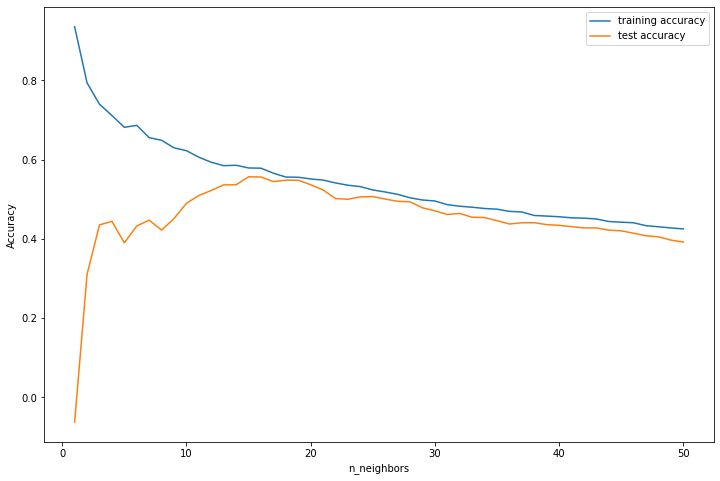

In [23]:
# creating lists for training set accuracy and test set accuracy
training_accuracy = []
test_accuracy     = []


# building a visualization of 1 to 50 neighbors
neighbors_settings = range(1, 51)


for n_neighbors in neighbors_settings:
    # Building the model
    clf = KNeighborsRegressor(n_neighbors = n_neighbors)
    clf.fit(X_train_stand, y_train_stand)
    
    # Recording the training set accuracy
    training_accuracy.append(clf.score(X_train_stand, y_train_stand))
    
    # Recording the generalization accuracy
    test_accuracy.append(clf.score(X_test_stand, y_test_stand))


# plotting the visualization
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

In [24]:
# finding the optimal number of neighbors
opt_neighbors = test_accuracy.index(max(test_accuracy)) + 1
print(f"""The optimal number of neighbors is {opt_neighbors}""")

The optimal number of neighbors is 15


In [25]:
# INSTANTIATING a model with the optimal number of neighbors
knn_stand = KNeighborsRegressor(algorithm = 'auto',
                   n_neighbors = opt_neighbors)



# FITTING the model based on the training data
knn_stand_fit = knn_stand.fit(X_train_stand, y_train_stand)



# PREDITCING on new data
knn_stand_pred = knn_stand_fit.predict(X_test_stand)



# SCORING the results
print('KNN Training Score:', knn_stand.score(X_train_stand, y_train_stand).round(4))
print('KNN Testing Score :',  knn_stand.score(X_test_stand, y_test_stand).round(4))


# saving scoring data for future use
knn_stand_score_train = knn_stand.score(X_train_stand, y_train_stand).round(4)
knn_stand_score_test  = knn_stand.score(X_test_stand, y_test_stand).round(4)

# displaying and saving the gap between training and testing
print('KNN Train-Test Gap:', abs(knn_stand_score_train - knn_stand_score_test).round(4))
knn_stand_test_gap = abs(knn_stand_score_train - knn_stand_score_test).round(4)

KNN Training Score: 0.579
KNN Testing Score : 0.5568
KNN Train-Test Gap: 0.0222


In [26]:
# comparing results

print(f"""

Chosen model: ARD  <- Important!

Model      Train Score      Test Score      Test Gap
-----      -----------      ----------      -----------
OLS        {reg_train_score}           {reg_test_score}          {reg_test_gap}
Lasso      {lasso_train_score}           {lasso_test_score}          {lasso_test_gap}
ARD        {ard_train_score}           {ard_test_score}          {ard_test_gap} <-  row with values of the chosen model!
KNN        {knn_stand_score_train}            {knn_stand_score_test}          {knn_stand_test_gap}
""")



Chosen model: ARD  <- Important!

Model      Train Score      Test Score      Test Gap
-----      -----------      ----------      -----------
OLS        0.6888           0.7224          0.0336
Lasso      0.6876           0.7305          0.0429
ARD        0.6864           0.7356          0.0492 <-  row with values of the chosen model!
KNN        0.579            0.5568          0.0222

